In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def variance(x):
    n = len(x)
    x_mean = np.mean(x, axis=0)
    var = np.sum((x - x_mean)**2) / n 
    return var

def std(x):
    return np.sqrt(variance(x))\

def sum_squared_error (y, line):
    n = len(y)
    error = np.sum( (y - line[:n])**2)
    return error

def r2(y,line):
    n = len(y)
    mean_var = variance(y)
    fit_var = sum_squared_error(y,line[:n]) / n 
    #r2 = mean_var - fit_var / mean_var
    r2 = 1 - fit_var / mean_var
    return r2

def f_score(y, line):
    n = len(y)
    p = 2
    mean_var = np.sum((y-np.mean(y))**2) # 
    fit_var = sum_squared_error(y,line[:n])
    explained_var = (mean_var - fit_var) / (p-1)
    unexplained_var = fit_var / (n-2)
    f = explained_var / unexplained_var
    return f

# Equations

## Linear Equation

$\hat{y} = wx + b$.

## Cost Function

$
\text{MSE} = \frac{1}{N} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$

# Derivatives

$\frac{df}{dw} = -2 x \cdot \big(y_i - (w x + b)\big) = -2x \cdot \big(y_i - \hat{y})$

$\frac{df}{db} = -2 \cdot \big(y_i - (w x + b)\big) = -2 \cdot \big(y_i - \hat{y})$

## Update Rules

$ a: Learning Rate$

${w} = w - a \cdot dw$.

$b = b - a \cdot db$

# Model

In [103]:
class LinearRegression():
    def __init__(self, lr=0.001, epochs=100):
        self.lr = lr
        self.epochs = epochs
        
    def loss_function(self,actual, prediction):
        n = len(actual)
        loss = np.sum((actual - prediction)**2) / n
        return loss

    def calculate_weight_derivative(self,x,loss):
        dw = -2*x * loss
        db = -2 * loss
        return dw, db

    def update_weights(self,w, dw):
        return w - self.lr * dw

    def fit(self,x,y):
        self.weights = np.random.randn(x.shape[1])
        self.bias = np.random.randn(1)
        for i in range(self.epochs):
            for j in range(len(x)):
                y_hat = np.dot(x[j] , self.weights) + self.bias
                loss = (y[j] - y_hat)
                dw, db = self.calculate_weight_derivative(x[j],loss)
                self.weights = self.update_weights(self.weights, dw)
                self.bias = self.update_weights(self.bias, db)

    def predict(self,x):
        return np.dot(x ,self.weights) + self.bias

In [143]:
df = pd.read_csv('multiple_linear_regression_dataset.csv')
x = df.iloc[:, 1:2].values
y = df.iloc[:, -1].values

In [144]:
# Train model
model = LinearRegression(lr=0.01, epochs=10)
model.fit(x, y)

In [145]:
y_pred = model.predict(x)

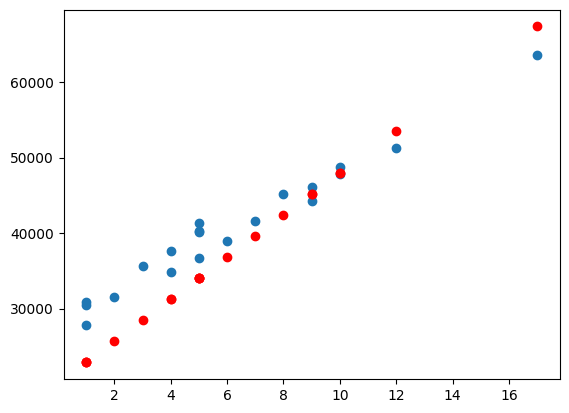

In [147]:
plt.scatter(x, y)
plt.scatter(x,y_pred, color='red')

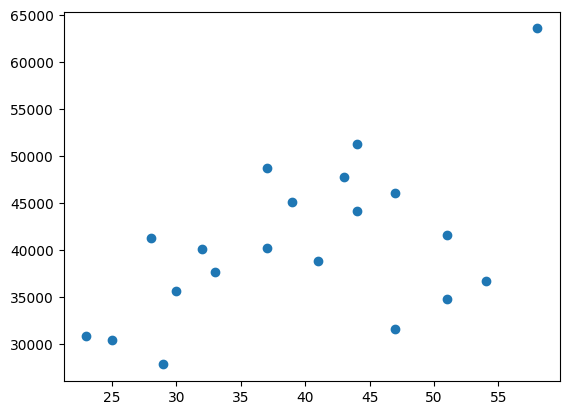

In [151]:
plt.scatter(df['age'], y)